3 case study days:  April 15, April 26, May 29

In [89]:
import xarray as xr
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
data1 = 'data_crop_04_15.nc'
data2 = 'data_crop_04_26.nc'
data3 = 'data_crop_05_29.nc'
res1 = '20140415_1645Z.nc'
plt.rcParams['figure.figsize'] = [4, 4]

In [119]:
data_ds = xr.open_dataset(data1)
data_ci = data_ds.data_vars['ci']
we_int = np.arange(240.0,280.0,dtype=np.float32)
sn_int = np.arange(32.0,88.0,dtype=np.float32)
#data_crs = data_ci.sel(west_east=we_int,
#                       south_north=sn_int)
#print(data_crs)
#print(data_ci)

In [120]:
res_ds = xr.open_dataset(res1)
res_ci = res_ds.data_vars['ci']
#res_crs = res_ci.sel(west_east=we_int,
#                    south_north=sn_int)
print(np.array(res_ci.ensemble_number.values,dtype=int))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [137]:
data = res_ci.values
print(data.shape)
# trim last column and row
data = data[:,:,:-1,:-1]
(times, ens, south_north, west_east) = data.shape
sn_coarse = int(south_north/4)
we_coarse = int(west_east/4)
data_crs = np.zeros((times,ens,sn_coarse,we_coarse))
print(data_crs.shape)
for t in range(times):
    print(t)
    for e in range(ens):
        frame = data[t,e,:,:]
        for sn in range(sn_coarse):
            for we in range(we_coarse):
                data_crs[t,e,sn,we] = np.average(frame[4*sn:4*sn+4,
                                                       4*we:4*we+4])

df_crs = xr.DataArray(data_crs,
                    coords=[res_ci.time.values,
                            np.array(res_ci.ensemble_number.values,dtype=int),
                            sn_int,we_int],
                    dims=['time','ensemble_number','south_north',
                           'west_east'],
                    name='ci')
print(df_crs)

(5, 20, 225, 161)
(5, 20, 56, 40)
0
1
2
3
4
<xarray.DataArray 'ci' (time: 5, ensemble_number: 20, south_north: 56, west_east: 40)>
array([[[[ 0.019125, ..., -0.007047],
         ...,
         [ 0.014271, ...,  0.003188]],

        ...,

        [[ 0.019125, ..., -0.007047],
         ...,
         [ 0.014271, ...,  0.003188]]],


       ...,


       [[[ 0.013933, ...,  0.042617],
         ...,
         [ 0.01504 , ...,  0.005407]],

        ...,

        [[ 0.015673, ...,  0.058225],
         ...,
         [ 0.021396, ...,  0.006442]]]])
Coordinates:
  * time             (time) datetime64[ns] 2014-04-15T16:45:00 ... 2014-04-15T17:45:00
  * ensemble_number  (ensemble_number) int32 0 1 2 3 4 5 6 ... 14 15 16 17 18 19
  * south_north      (south_north) float32 32.0 33.0 34.0 ... 85.0 86.0 87.0
  * west_east        (west_east) float32 240.0 241.0 242.0 ... 277.0 278.0 279.0


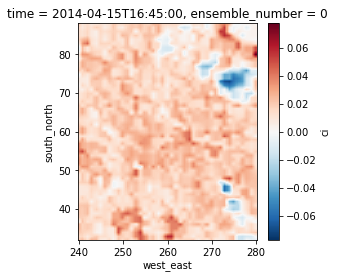

In [122]:
# two dfs: res_ci, df_crs
res0 = res_ci[0,0,:,:]
crs0 = df_crs[0,0,:,:]
res0.plot()
plt.show()

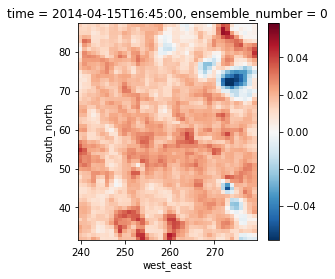

In [123]:
crs0.plot()
plt.show()

In [141]:
name = res1[:-3]+'_crs.nc'

2/19: Redo weighting : 7x7 weighting9r
Considered weighting points away from some center point proportional to 1/something(r) in each ensemble member for all ensemble member: weighted sample variance wiki
do reliability diagrams! for probabilities for spread out mask, do the sum with weights like those done for the coarsening. 
skill on mean abs error vs spread plots?
skill score, skill vs spread, see Wilks pg 305. 
persistence = reference = no change in observation over some time horizon.